In [20]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

hp = pd.read_csv("~/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML/data/HousePrice2.csv", \
                 index_col = 0)
hp_res= hp[hp['MSZoning'].isin(['FV','RH','RL','RM'])]
hp_res = hp_res.dropna()
hp_res.shape

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML/Tyler


(2530, 83)

In [21]:
hp_res1 = hp_res.drop(['MapRefNo','PID', 'Prop_Addr'], \
                               axis = 1)
num_features = hp_res1._get_numeric_data()  \
 .drop(['MSSubClass','latitude','longitude','Unnamed: 0.1'], axis = 1)
num_features['bath'] = num_features['FullBath'] + 0.5*num_features['HalfBath']
numCol = num_features.columns

In [22]:
col = hp_res1.columns
catCol = [col for col in hp_res1.columns if col not in num_features.columns]
cat_features = hp_res[catCol].drop(['address', 'latitude', 'longitude','Unnamed: 0.1'],axis = 1)
cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [23]:
features = pd.concat([num_features, cat_features], axis = 1) \
           .drop(['FullBath', 'HalfBath', \
                  'BsmtFullBath', 'BsmtHalfBath', \
                  'BsmtFinSF1','SalePrice','ExterQual', \
                  'Condition1','Condition2', \
                  'BsmtFinType1','BsmtFinType2', \
                  'BsmtQual', 'GarageQual','MoSold',   \
                  'BsmtFinSF2', 'BsmtUnfSF'],axis = 1)

In [5]:
# nb = features['Neighborhood'].unique()
# def label_nb(row):
#     if row['Neighborhood'] in (['NridgHt','NoRidge','Veenker','StoneBr']):      
#         return 'N'
#     if row['Neighborhood']      \
#              in (['Blmngtn','Gilbert','OldTown', 'NWAmes','NAmes','Blmngtn','BrDale','Somerst','BrkSide','Greens','NPkVill']):
#         return 'NE'
#     if row['Neighborhood']      \
#             in (['CollgCr','SWISU', 'Edwards','SawyerW','Sawyer','ClearCr']):
#         return 'W'                      
#     if row['Neighborhood'] in (['Crawfor','MeadowV','Timber','Mitchel','IDOTRR']):     
#         return 'S'
    
# features['Location']=features.apply(lambda row: label_nb(row), axis = 1)
# features = features.drop(['Neighborhood'], axis = 1)
# features1 = features    

In [8]:
catCol = [col for col in features.columns if col not in num_features.columns]
features= pd.get_dummies(features, columns = catCol, drop_first = True)

y = hp_res['SalePrice']
hp_res['log_Price'] = np.log10(hp_res['SalePrice'])
logy = hp_res['log_Price']

In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import neighbors
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [17]:
# train_dum_df = pd.read_csv('HousePrice2 (1).csv', index_col=0)
# test_dum_df = pd.read_csv('HousePrice2 (1).csv', index_col=0)

In [18]:
# y = train_dum_df['SalePrice'].apply(np.log)
# X = train_dum_df.drop(["SalePrice"], axis = 1)

In [10]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, logy, test_size = 0.3, random_state = 0)

In [16]:
ols = LinearRegression()

ols.fit(X_train_log, y_train_log)
cv = np.mean(cross_val_score(ols, X_train_log, y_train_log))
pred = ols.predict(X_test_log)
RMSE = (mean_squared_error(pred, y_test_log, squared = False))


print("R^2 train set: %f" %ols.score(X_train_log, y_train_log))
print("R^2 test  set: %f" %ols.score(X_test_log, y_test_log))
print("CV R^2 train set: " + str(round(cv,5)))
print("RMSE: " + str(round(RMSE, 5))) 

R^2 train set: 0.937251
R^2 test  set: 0.930575
CV R^2 train set: -1020920.22277
RMSE: 0.04297


In [17]:
X  = features['GrLivArea','LotFrontage','LotArea','OverallQual',]

-1020920.2227747937

In [18]:
features.columns

Index(['Unnamed: 0', 'GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_VWD',
       'SaleType_WD ', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

Text(0, 0.5, 'Predicted Value')

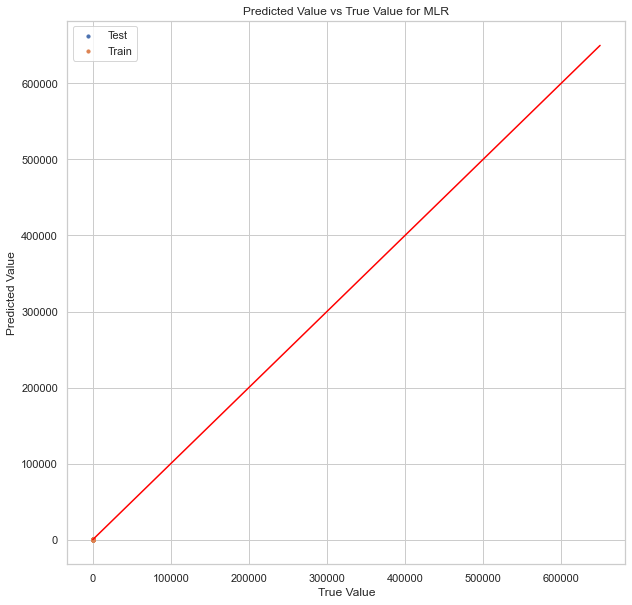

In [21]:
# plt.figure(figsize=(10,10))
# plt.scatter(x = np.exp(y_test_log), y = np.exp(pred), s = 10, label = "Test")
# plt.scatter(x = np.exp(y_train_log), y = np.exp(ols.predict(X_train_log)), s = 10, label = "Train")
# plt.plot([0,650000],[0,650000], color = "red")
# plt.legend(loc = 0)
# plt.title("Predicted Value vs True Value for MLR")
# plt.xlabel("True Value")
# plt.ylabel("Predicted Value")

In [45]:
# Feature Selection after lasso
features = features[['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', \
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', \
       '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', \
       'Fireplaces', 'GarageYrBlt', 'GarageArea', \
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',   \
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold',  \
       'MSZoning','Foundation', 'BsmtExposure',  \
       'HeatingQC']]
catCol2 = ['Foundation', 'BsmtExposure', 'HeatingQC'] 
X = get_dummies(features, columns= catCol2, drop_first = True)


NameError: name 'get_dummies' is not defined

In [36]:
features= pd.get_dummies(features, columns = catCol, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(features, logy, test_size = 0.3, random_state = 0)



,Foundation,BsmtExposure,HeatingQC
0,CBlock,No,TA
1,CBlock,Mn,TA
2,CBlock,Mn,TA
4,BrkTil,No,Gd
5,PConc,No,Ex
...,...,...,...
2619,BrkTil,No,Fa
2620,Slab,No Basement,Ex
2621,CBlock,No,TA
2622,PConc,No,Ex


In [32]:
#run multiple linear regression using features selected with Lasso regression
ols = LinearRegression()
ols.fit(X_train, y_train)


ValueError: could not convert string to float: 'RL'